### Original Preprocessing from Jaime
###EDITED TO ADD SOME CHARACTERISTICS FOR TABLEONE


In [73]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot
import pylab
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon
from tableone import TableOne
import random

import networkx as nx

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [74]:
data = ''
output_data = ''
data_to_go = ''


fhs_network_features = True 
if fhs_network_features:
    #### NOTE This data is generated in script: FHS_network_features_extraction_for_survival_models_v5
    #### first version (original results on July 2021)
    # fhs_network_features = pd.read_csv(output_data + 'FHS_participants_extracted_network_features.csv')
    #### second version (Vidya's code for wave 1 selection)
    fhs_network_features = pd.read_csv(output_data + 'FHS_participants_extracted_network_features_wave1.csv')
    print ("fhs_network_features: loaded")
    print(fhs_network_features.shape)
    
demsurv_data = True
if demsurv_data:
    demsurv_data = pd.read_sas(data + 'vr_demsurv_2018_a_1281s_19.sas7bdat',
                              format='sas7bdat')
    print ("demsurv_data: loaded")
    print(demsurv_data.shape)

wkthru_data = True
if wkthru_data:
    wkthru_data = pd.read_sas(data_to_go + 'vr_wkthru_ex09_1_1001s_16.sas7bdat',
                              format='sas7bdat')
    print ("wkthru_data: loaded")
    print(wkthru_data.shape)


apoe_data = True
if apoe_data:
    apoe_data = pd.read_sas(data_to_go + 'coh_off_apoe_16.sas7bdat',
                              format='sas7bdat')
    print ("apoe_data: loaded")
    print(apoe_data.shape)

diab_data = True
if diab_data:
    diab_data = pd.read_sas(data + 'vr_diab_ex09_1_1002s_19.sas7bdat',
                              format='sas7bdat')
    print ("diab_data: loaded")
    print(diab_data.shape)
    
educ_data = True
if educ_data:
    educ_data = pd.read_sas(data_to_go + 'gen2_education_4levels_19.sas7bdat',encoding="unicode_escape")
    # if problems when opening, change data limit in notebook by typing the following in terminal
    # jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
    print ("educ_data: loaded")
    print(educ_data.shape)

cvd = True
if cvd:
    cvd = pd.read_sas(data + 'vr_soe_2019_a_1217s_19.sas7bdat')    
    print ("cvd: loaded")
    print (cvd.shape)

neuropsych = True
if neuropsych:
    neuropsych = pd.read_sas(data_to_go + 'ex1_7s_v2_16.sas7bdat')    
    print ("neuropsych: loaded")
    print (neuropsych.shape)
    
network_diversity_tb = True
if network_diversity_tb:
    #network_diversity_tb = pd.read_csv(output_data + 'FHS_network_feature_extraction_DIVERSITY_tb.csv') 
    ### Generated on Vidya's script
    network_diversity_tb = pd.read_csv(output_data + 'fhs_sn_diversity_wave1.csv',index_col=0)    
    
    print ("network_diversity_tb: loaded")
    print (network_diversity_tb.shape)


fhs_network_features: loaded
(7837, 12)
demsurv_data: loaded
(11129, 6)
wkthru_data: loaded
(4987, 207)
apoe_data: loaded
(5381, 3)
diab_data: loaded
(5002, 20)


/usr/local/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


educ_data: loaded
(5002, 6)
cvd: loaded
(19486, 7)


/usr/local/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]


neuropsych: loaded
(3482, 554)
network_diversity_tb: loaded
(40916, 41)


# Clean network features [NOTE: these are calculated elsewhere]

In [75]:
x = fhs_network_features.copy()
x = x.drop(columns=['Unnamed: 0'])
x = x.rename(columns={'index': 'idr'})


fhs_network_features_clean = x.copy()
fhs_network_features_clean.head()




,idr,DENSITY,CONSTRAINT,EFFECTIVE_SIZE,DEGREE,DEGREE_CENTRALITY,EIGENVECTOR,KATZ,CLOSENESS_CENTRALITY,BETWEENNESS_CENTRALITY,CLUSTCOEF
0,2.450817e+09,0.00087,1.000000,1.000000,1,0.000128,1.858149e-10,0.000087,0.098151,0.000000,0.000000
1,2.450617e+09,0.00087,0.506173,2.333333,3,0.000383,5.258004e-09,0.000071,0.110117,0.000231,0.333333
2,2.450203e+09,0.00087,0.107119,5.666667,21,0.002680,4.653956e-03,0.001595,0.194065,0.000304,0.766667
3,2.450571e+09,0.00087,0.075507,15.965517,29,0.003701,5.537345e-03,-0.010123,0.195987,0.001904,0.465517
4,2.450942e+09,0.00087,0.049222,37.928571,56,0.007147,2.650506e-02,-0.006316,0.211850,0.009554,0.328571


# Clean CVD history

In [76]:
x = cvd.copy()
x.head()

,idr,IDTYPE,EVENT,PAGENUM,LINENUM,DATE,REVDATE
0,2.450200e+09,0.0,6.0,NaN,NaN,9711.0,NaN
1,2.450200e+09,0.0,27.0,NaN,NaN,11022.0,NaN
2,2.450200e+09,1.0,6.0,NaN,NaN,10650.0,NaN
3,2.450200e+09,0.0,26.0,NaN,NaN,3534.0,NaN
4,2.450200e+09,0.0,2.0,NaN,NaN,15437.0,NaN


In [77]:
### Check documentation for the dictionary for table "vr_soe_2018_a_1311d.sas7bdat" (uses same variables)

x.loc[(
    
    ### MI
    (x['EVENT'] == 1.0)
    ^(x['EVENT'] == 2.0)
    ^(x['EVENT'] == 3.0)
    ^(x['EVENT'] == 4.0)
    ^(x['EVENT'] == 5.0)
    ^(x['EVENT'] == 6.0)
    ^(x['EVENT'] == 7.0)
    ^(x['EVENT'] == 8.0)
    
    ### CVA (TIA/Stroke/ICH/ABI)
    ^(x['EVENT'] == 10.0)
    ^(x['EVENT'] == 11.0)
    ^(x['EVENT'] == 12.0)
    ^(x['EVENT'] == 13.0)
    ^(x['EVENT'] == 14.0)
    ^(x['EVENT'] == 15.0)
    ^(x['EVENT'] == 16.0)
    ^(x['EVENT'] == 17.0)
    ^(x['EVENT'] == 18.0)
    ^(x['EVENT'] == 19.0)
    
    ### Death CVA/CHD/CVD
    ^(x['EVENT'] == 21.0)
    ^(x['EVENT'] == 22.0)
    ^(x['EVENT'] == 23.0)
    ^(x['EVENT'] == 24.0)
    ^(x['EVENT'] == 25.0)
    ^(x['EVENT'] == 26.0)
    
    ### IC (intermitent claudication)
    ^(x['EVENT'] == 30.0)
    ^(x['EVENT'] == 31.0)
    ^(x['EVENT'] == 32.0)
    ^(x['EVENT'] == 33.0)
    ^(x['EVENT'] == 34.0)
    ^(x['EVENT'] == 35.0)
    ^(x['EVENT'] == 36.0)
    ^(x['EVENT'] == 37.0)
    ^(x['EVENT'] == 38.0)
    ^(x['EVENT'] == 39.0)
    
    ### CHF
    ^(x['EVENT'] == 40.0)
    ^(x['EVENT'] == 41.0)
    ^(x['EVENT'] == 42.0)
    ^(x['EVENT'] == 43.0)
    ^(x['EVENT'] == 44.0)
    ^(x['EVENT'] == 45.0)
    ^(x['EVENT'] == 46.0)
    ^(x['EVENT'] == 47.0)
    ^(x['EVENT'] == 48.0)
    ^(x['EVENT'] == 49.0)
    
    ), 'CVD'] = 1 ### Cardiovascular events

### Other causes = zero
x.loc[(       
     (x['EVENT'] == 27.0) # cancer death
    ^(x['EVENT'] == 28.0) # death other
    ^(x['EVENT'] == 29.0) # death unknown
    
    ), 'CVD'] = 0 ### Cardiovascular events
    
# fill missing observation with a zero (no event)
x['CVD'] = x['CVD'].fillna(0)
                               
#x = x.pivot(index='PID', columns='EVENT', values='DATE')
x['CVD'].value_counts()

1.0    14382
0.0     5104
Name: CVD, dtype: int64

In [78]:
### Select only first CVD events for each patient 
### History of CVD should start with the earliest event

x = x.loc[x.groupby('idr').DATE.idxmin()]
x.head()

,idr,IDTYPE,EVENT,PAGENUM,LINENUM,DATE,REVDATE,CVD
0,2.450200e+09,0.0,6.0,NaN,NaN,9711.0,NaN,1.0
2,2.450200e+09,1.0,6.0,NaN,NaN,10650.0,NaN,1.0
3,2.450200e+09,0.0,26.0,NaN,NaN,3534.0,NaN,1.0
4,2.450200e+09,0.0,2.0,NaN,NaN,15437.0,NaN,1.0
7,2.450200e+09,1.0,12.0,112.0,18.0,12828.0,NaN,1.0


In [79]:
x = x[[
    'EVENT',
    'DATE',
    'idr',
    'CVD',
]].copy()

x = x.rename(columns={'EVENT':'CVD_EVENT_TYPE',
                      'DATE':'CVD_EVENT_DATE',
                      'CVD':'CVD_YES'})

cvd_tb = x.copy()
cvd_tb.head()

,CVD_EVENT_TYPE,CVD_EVENT_DATE,idr,CVD_YES
0,6.0,9711.0,2.450200e+09,1.0
2,6.0,10650.0,2.450200e+09,1.0
3,26.0,3534.0,2.450200e+09,1.0
4,2.0,15437.0,2.450200e+09,1.0
7,12.0,12828.0,2.450200e+09,1.0


# Integrate death status at follow up for competing-risks analysis

In [80]:
x = cvd.copy()
x.head()

,idr,IDTYPE,EVENT,PAGENUM,LINENUM,DATE,REVDATE
0,2.450200e+09,0.0,6.0,NaN,NaN,9711.0,NaN
1,2.450200e+09,0.0,27.0,NaN,NaN,11022.0,NaN
2,2.450200e+09,1.0,6.0,NaN,NaN,10650.0,NaN
3,2.450200e+09,0.0,26.0,NaN,NaN,3534.0,NaN
4,2.450200e+09,0.0,2.0,NaN,NaN,15437.0,NaN


In [81]:
# we get the info from cvd table

x = cvd.copy()

x.loc[(

### Death due to multiple reasons (CHD, CVD, Cancer, other, or unknown)
    (x['EVENT'] == 21.0)
    ^(x['EVENT'] == 22.0)
    ^(x['EVENT'] == 23.0)
    ^(x['EVENT'] == 24.0)
    ^(x['EVENT'] == 25.0)
    ^(x['EVENT'] == 26.0)
    ^(x['EVENT'] == 27.0)
    ^(x['EVENT'] == 28.0)
    ^(x['EVENT'] == 29.0)
    
        ), 'Death_status_at_followup'] = 1

# fill missing observation with a zero (no event)
#x['CVD'] = x['CVD'].fillna(0)

x = x[[
    'idr',
    'DATE',
    'Death_status_at_followup'
]].copy()

x = x.rename(columns={'DATE':'Deceased_Date'})

#x = x.drop_duplicates(subset='PID')
x = x.loc[x.groupby('idr').Deceased_Date.idxmin()]
x = x.dropna()

death_status = x.copy()
print(death_status.shape)
death_status.head()

(3406, 3)


,idr,Deceased_Date,Death_status_at_followup
3,2.450200e+09,3534.0,1.0
8,2.450201e+09,11559.0,1.0
12,2.450201e+09,5173.0,1.0
13,2.450201e+09,6512.0,1.0
14,2.450202e+09,10882.0,1.0


In [82]:
death_status['Death_status_at_followup'].value_counts()

1.0    3406
Name: Death_status_at_followup, dtype: int64

# Clean dementia survival

In [83]:
x = demsurv_data.copy()

x = x.drop(columns='idtype')

# transform days to months
x['DEM_SURVDATE']=x['DEM_SURVDATE']/365

### consider including those participants who have dementia follow-up data after Exam 5 only
### because any participant who dies (or, less likely, drops out) is probably just contributing noise. 
### Wave 1 offspring is years 1971-1975 (monts 1-43)
### exam 5 -- 1991/1995 -- months 227 - 281
### the difference between exam 5 and exam 1 is:
### 1991 - 1975 = 16 years
### eliminate any observation of dementia before exam 5

print(x.shape)
x = x.loc[~(
    (x['DEM_SURVDATE'] < 16) # this will drop dementia cases that occur before a 16 year window (exam5-exam1)
    & (x['DEM_STATUS'] == 1.0)
    )]
print(x.shape)

demsurv_data_clean = x.copy()
demsurv_data_clean.head()

(11129, 5)
(11110, 5)


,idr,DEM_STATUS,DEM_SURVDATE,AD_STATUS,VAD_STATUS
0,2.450200e+09,0.0,25.120548,0.0,0.0
1,2.450200e+09,0.0,45.736986,0.0,0.0
2,2.450200e+09,0.0,15.646575,0.0,0.0
3,2.450200e+09,0.0,23.750685,0.0,0.0
4,2.450200e+09,1.0,39.980822,1.0,0.0


# Clean wkthru_data

In [84]:
x = wkthru_data.copy()
# we want to get Offspring Exam 1
print(x.shape)
x.head()

(4987, 207)


,idr,IDTYPE,SEX,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,BG1,BG2,BG3,BG4,BG5,BG6,BG7,BG8,BG9,BMI1,BMI2,BMI3,BMI4,BMI5,BMI6,BMI7,BMI8,BMI9,CALC_LDL1,CALC_LDL2,CALC_LDL3,CALC_LDL4,CALC_LDL5,CALC_LDL6,CALC_LDL7,CALC_LDL8,CALC_LDL9,CPD1,CPD2,CPD3,CPD4,CPD5,CPD6,CPD7,CPD8,CPD9,CREAT2,CREAT5,CREAT6,CREAT7,CREAT8,CREAT9,CURRSMK1,CURRSMK2,CURRSMK3,CURRSMK4,CURRSMK5,CURRSMK6,CURRSMK7,CURRSMK8,CURRSMK9,DBP1,DBP2,DBP3,DBP4,DBP5,DBP6,DBP7,DBP8,DBP9,DLVH1,DLVH2,DLVH3,DLVH4,DLVH5,DLVH6,DLVH7,DLVH8,DLVH9,FASTING_BG3,FASTING_BG4,FASTING_BG5,FASTING_BG6,FASTING_BG7,FASTING_BG8,FASTING_BG9,HDL1,HDL2,HDL3,HDL4,HDL5,HDL6,HDL7,HDL8,HDL9,HGT1,HGT2,HGT3,HGT4,HGT5,HGT6,HGT7,HGT8,HGT9,HIP4,HIP5,HIP6,HIP7,HIP9,SBP1,SBP2,SBP3,SBP4,SBP5,SBP6,SBP7,SBP8,SBP9,TC1,TC2,TC3,TC4,TC5,TC6,TC7,TC8,TC9,TRIG1,TRIG2,TRIG3,TRIG4,TRIG5,TRIG6,TRIG7,TRIG8,TRIG9,VENT_RT1,VENT_RT2,VENT_RT3,VENT_RT4,VENT_RT5,VENT_RT6,VENT_RT7,VENT_RT8,VENT_RT9,WAIST4,WAIST5,WAIST6,WAIST7,WAIST8,WAIST9,WGT1,WGT2,WGT3,WGT4,WGT5,WGT6,WGT7,WGT8,WGT9,DMRX1,DMRX2,DMRX3,DMRX4,DMRX5,DMRX6,DMRX7,DMRX8,DMRX9,HRX1,HRX2,HRX3,HRX4,HRX5,HRX6,HRX7,HRX8,HRX9,LIPRX1,LIPRX2,LIPRX3,LIPRX4,LIPRX5,LIPRX6,LIPRX7,LIPRX8,LIPRX9,DATE1,DATE2,DATE3,DATE4,DATE5,DATE6,DATE7,DATE8,DATE9
0,2.450200e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,37.0,42.0,45.0,49.0,54.0,56.0,63.0,68.0,105.0,114.0,94.0,90.0,110.0,100.0,98.0,105.0,98.0,30.854764,29.445156,30.048592,31.637880,31.788152,29.758402,27.878924,30.541518,32.033110,98.0,108.0,96.0,132.0,98.0,116.0,118.0,72.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,1.41,1.34,1.10,1.17,1.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,93.0,93.0,102.0,85.0,85.0,85.0,80.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,90.0,110.0,100.0,98.0,105.0,NaN,37.0,29.0,37.0,36.0,33.0,32.0,37.0,39.0,37.0,67.00,67.0,66.50,67.00,67.5,67.0,67.00,67.00,66.75,40.00,41.00,40.00,39.25,40.25,149.0,132.0,130.0,140.0,126.0,126.0,117.0,133.0,137.0,167.0,157.0,163.0,197.0,171.0,166.0,179.0,137.0,116.0,160.0,100.0,149.0,146.0,201.0,89.0,122.0,128.0,112.0,70.0,72.0,70.0,64.0,70.0,66.0,48.0,54.0,60.0,39.0,39.0,36.5,36.0,38.75,41.0,197.0,188.0,189.0,202.0,206.0,190.0,178.0,195.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2893.0,4598.0,5706.0,7090.0,8788.0,9695.0,12239.0,14191.0
1,2.450200e+09,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.071179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.450200e+09,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,26.0,NaN,38.0,42.0,45.0,50.0,NaN,NaN,NaN,118.0,NaN,94.0,104.0,107.0,104.0,NaN,NaN,NaN,29.770382,NaN,30.419032,31.228107,33.226910,33.079234,NaN,NaN,NaN,116.0,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.49,0.86,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,70.0,NaN,98.0,94.0,88.0,90.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,94.0,104.0,107.0,104.0,NaN,NaN,NaN,24.0,NaN,20.0,24.0,19.0,26.0,NaN,NaN,NaN,69.75,NaN,70.00,69.25,69.0,69.0,NaN,NaN,NaN,41.25,42.75,42.75,NaN,NaN,120.0,NaN,137.0,140.0,141.0,133.0,NaN,NaN,NaN,179.0,NaN,251.0,195.0,248.0,191.0,NaN,NaN,NaN,195.0,NaN,596.0,432.0,952.0,349.0,NaN,NaN,NaN,65.0,NaN,62.0,72.0,60.0,67.0,NaN,NaN,NaN,39.0,41.0,41.5,NaN,NaN,NaN

In [85]:
x = x[[
    'idr',
    'SEX',
    'AGE1',
    'BMI1',
    #'BG1', # blood glucose exam 1 (not fasting), get diabetes from other existing table
    'CURRSMK1', # smoking status
    'SBP1',
    'DBP1',
    'CALC_LDL1',
    'HDL1',
    'TC1', # total cholesterol
    'TRIG1',
    'DATE1', # date of exam 1
    
]].copy()

wkthru_data_select = x.copy()
wkthru_data_select.head()

,idr,SEX,AGE1,BMI1,CURRSMK1,SBP1,DBP1,CALC_LDL1,HDL1,TC1,TRIG1,DATE1
0,2.450200e+09,1.0,30.0,30.854764,0.0,149.0,98.0,98.0,37.0,167.0,160.0,0.0
1,2.450200e+09,2.0,16.0,29.071179,0.0,140.0,78.0,152.0,61.0,247.0,168.0,0.0
2,2.450200e+09,1.0,26.0,29.770382,0.0,120.0,70.0,116.0,24.0,179.0,195.0,0.0
3,2.450200e+09,2.0,26.0,20.829412,0.0,113.0,78.0,164.0,34.0,211.0,63.0,0.0
4,2.450201e+09,1.0,27.0,24.366400,0.0,100.0,68.0,105.0,61.0,177.0,55.0,0.0


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE1', ylabel='Density'>

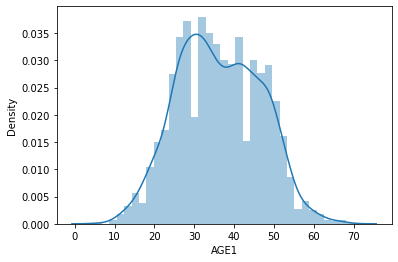

In [86]:
sns.distplot(wkthru_data_select['AGE1'])

In [87]:
wkthru_data_select['AGE1'].describe()

count    4987.000000
mean       36.202126
std        10.461227
min         5.000000
25%        28.000000
50%        36.000000
75%        44.000000
max        70.000000
Name: AGE1, dtype: float64

# Clean ApoE data

In [88]:
apoe_data.head()

,idr,idtype,APOE
0,2.450200e+09,1.0,34.0
1,2.450200e+09,1.0,23.0
2,2.450201e+09,1.0,34.0
3,2.450201e+09,1.0,33.0
4,2.450201e+09,1.0,33.0


In [89]:
x = apoe_data.copy()
x = x.drop(columns='idtype')

x['APOE'].value_counts()

33.0    3464
34.0    1038
23.0     672
24.0      94
44.0      89
22.0      24
Name: APOE, dtype: int64

In [90]:
# APOE ε2 is relatively rare and may provide some protection against the disease
# APOE ε3, the most common allele, neutral role, neither decreasing nor increasing risk
# Having one or two APOE ε4 alleles increases the risk of developing Alzheimer's. 
# About 25 percent of people carry one copy of APOE ɛ4
# ~ 2 to 3 percent carry two copies

In [91]:
x.loc[(
    (x['APOE'] == 34.0)
    ^ (x['APOE'] == 24.0)
    ^ (x['APOE'] == 44.0)
), 'APOE_risk'] = 1
x['APOE_risk'] = x['APOE_risk'].fillna(0)

x['APOE_risk'].value_counts()

0.0    4160
1.0    1221
Name: APOE_risk, dtype: int64

In [92]:
apoe_data_clean = x.copy()
apoe_data_clean.head()

,idr,APOE,APOE_risk
0,2.450200e+09,34.0,1.0
1,2.450200e+09,23.0,0.0
2,2.450201e+09,34.0,1.0
3,2.450201e+09,33.0,0.0
4,2.450201e+09,33.0,0.0


# Clean diab data

In [93]:
x = diab_data[[
    'idr',
    'CURR_DIAB1'
]].copy()

diab_data_clean = x.copy()
diab_data_clean.head()

,idr,CURR_DIAB1
0,2.450200e+09,0.0
1,2.450200e+09,0.0
2,2.450200e+09,0.0
3,2.450200e+09,0.0
4,2.450201e+09,0.0


# Clean Education

In [94]:
educ_data['education_4level'].value_counts()

d:collgrad    1407
b:HSdeg       1335
c:somecoll    1185
noInfo         797
a:noHSdeg      278
Name: education_4level, dtype: int64

In [95]:
x = educ_data.copy()
x = x[[
    'idr',
    'education_4level'
]].copy()

x['education_4level'] = x['education_4level'].astype(str)
x['education_4level'] = x['education_4level'].str.replace("'", "")
x = x.loc[x['education_4level'] != 'noInfo'] # eliminate cases with no education information
x.loc[x['education_4level'] == 'a:noHSdeg', 'HS_education'] = 0 # assign zero if no HS education
x["HS_education"] = x["HS_education"].fillna(1) # all other cases have at least HS education

#bd:collgrad    1407
#bb:HSdeg       1335
#bc:somecoll    1185
#bnoInfo         797
#ba:noHSdeg      278

x = x[[
    'idr',
    'HS_education',
    'education_4level'
]].copy()

educ_clean = x.copy()

print(educ_clean.shape)
educ_clean["HS_education"].value_counts()

(4205, 3)


1.0    3927
0.0     278
Name: HS_education, dtype: int64

In [96]:
educ_clean

,idr,HS_education,education_4level
0,2.450200e+09,1.0,b:HSdeg
4,2.450201e+09,1.0,d:collgrad
5,2.450201e+09,1.0,c:somecoll
6,2.450201e+09,0.0,a:noHSdeg
8,2.450202e+09,1.0,b:HSdeg
...,...,...,...
4997,2.450949e+09,1.0,b:HSdeg
4998,2.450949e+09,1.0,d:collgrad
4999,2.450949e+09,1.0,b:HSdeg
5000,2.450949e+09,1.0,b:HSdeg


# clean neuropsych

In [97]:
x = neuropsych.copy()
x.head()

,idr,IDTYPE,G703,G704,G705,G706,G707,G002,G003,G004,G005,G006,G008,G009,G010,G011,G012,G013,G014,G015,G016,G017,G018,G019,G020,G021,G022,G023,G024,G025,G026,G027,G028,G029,G030,G031,G032,G033,G034,G035,G036,G037,G038,G039,G040,G041,G042,G043,G044,G045,G046,G047,G048,G049,G050,G051,G052,G053,G054,G055,G056,G057,G058,G059,G060,G061,G062,G063,G064,G065,G066,G067,G068,G069,G070,G071,G072,G073,G074,G075,G076,G077,G078,G079,G080,G081,G082,G083,G084,G085,G086,G087,G088,G089,G090,G091,G092,G093,G094,G095,G096,G097,G098,G099,G100,G101,G102,G103,G104,G105,G106,G107,G108,G109,G110,G111,G112,G113,G114,G115,G116,G117,G118,G119,G120,G121,G122,G123,G124,G125,G126,G127,G128,G129,G130,G131,G132,G133,G134,G135,G136,G138,G139,G140,G141,G144,G145,G146,G147,G148,G149,G150,G151,G152,G153,G154,G155,G160,G161,G164,G165,G166,G167,G171,G175,G176,G177,G178,G179,G180,G181,G182,G183,G184,G185,G186,G187,G188,G189,G193,G194,G195,G196,G197,G198,G199,G200,G203,G204,G205,G206,G207,G208,G210,G211,G212,G213,G214,G215,G216,G217,G218,G219,G220,G221,G222,G223,G224,G225,G227,G229,G231,G233,G235,G236,G238,G240,G242,G244,G246,G250,G271,G272,G273,G274,G275,G276,G277,G278,G279,G280,G281,G282,G283,G284,G285,G286,G287,G288,G289,G290,G291,G292,G293,G294,G295,G296,G297,G298,G299,G300,G301,G302,G303,G304,G305,G306,G307,G308,G309,G310,G317,G318,G319,G320,G321,G322,G323,G324,G325,G326,G329,G330,G331,G332,G333,G334,G335,G336,G337,G338,G339,G340,G341,G342,G343,G344,G345,G346,G347,G348,G349,G350,G351,G354,G355,G356,G357,G358,G359,G360,G361,G362,G363,G364,G365,G366,G367,G368,G369,G370,G371,G372,G373,G374,G375,G376,G377,G378,G379,G380,G381,G382,G383,G384,G385,G386,G387,G388,G389,G390,G391,G396,G397,G398,G399,G400,G402,G403,G404,G405,G408,G409,G410,G411,G413,G414,G415,G416,G417,G418,G419,G420,G421,G422,G423,G424,G427,G438,G440,G441,G443,G444,G445,G446,G447,G448,G449,G450,G451,G453,G454,G456,G457,G458,G459,G461,G462,G463,G476,G494,G495,G496,G497,G498,G499,G500,G501,G502,G505,G506,G507,G508,G509,G510,G511,G512,G513,G514,G515,G517,G518,G519,G520,G521,G522,G523,G524,G525,G526,G527,G529,G530,G531,G532,G533,G534,G535,G536,G537,G538,G539,G540,G541,G542,G543,G544,G545,G546,G547,G548,G549,G550,G552,G553,G554,G555,G556,G557,G558,G559,G560,G561,G562,G564,G565,G566,G587,G588,G589,G590,G591,G592,G593,G594,G595,G596,G597,G598,G599,G600,G601,G602,G603,G604,G605,G606,G608,G609,G610,G611,G612,G613,G614,G615,G616,G617,G618,G619,G620,G621,G622,G623,G624,G626,G627,G629,G630,G632,G633,G635,G636,G638,G639,G641,G642,G644,G645,G646,G647,G648,G649,G650,G651,G652,G653,G654,G655,G656,G657,G658,G659,G660,G661,G662,G663,G664,G665,G666,G667,G668,G669,G670,G671,G672,G673,G674,G675,G676,G677,G678,G679,G680,G681,G682,G683,G684,G685,G686,G687,G688,G689,G690,G691,G692,G693,G696,G697,G698,G699,G700,G701,G709,G708
0,2.450200e+09,1.0,37.0,179.0,98.0,122.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,88.0,8.0,8.0,88.0,8.0,88.0,8.0,88.0,88.0,8.0,8.0,8.0,8.0,88.0,88.0,8.0,8.0,8.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'00000000',0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,86.0,1.0,

In [98]:
#For CES-D score (depression):
#-       Dataset name = ex1_7s_v2_16
#-       Variable = sum of g587 through g606
 
col_list = ['G587', 'G588', 'G589', 'G590', 'G591', 'G592', 'G593',
            'G594', 'G595', 'G596', 'G597', 'G598', 'G599', 'G600',
            'G601', 'G602', 'G603', 'G604', 'G605', 'G606']

x['CES-D_score'] = x[col_list].sum(axis=1)

#For loneliness item in the CES-D questionnaire (loneliness):
#-       Dataset name = ex1_7s_v2_16
#-       Variable name = g600 (“CES-D-I FELT LONELY”)

x['CSD-D_loneliness_item'] = x['G600']

# mmse_cols = ['G'+n for int(n[1:]) in x.columns if n in range() 'G478-G502']
# no mmse cols

x = x[[
    'idr',
    'CES-D_score',
    'CSD-D_loneliness_item'
]].copy()




neuropsych_clean = x.copy()
neuropsych_clean.head()

,idr,CES-D_score,CSD-D_loneliness_item
0,2.450200e+09,16.0,0.0
1,2.450201e+09,12.0,0.0
2,2.450201e+09,29.0,1.0
3,2.450202e+09,14.0,0.0
4,2.450202e+09,13.0,0.0


# Clean network diversity tb

In [99]:
network_diversity_tb.head()

,idr,AGE35,AGE65,AGE_Q,AGE_10,sharealterid,RELTYPE,FAMILIAL,ALTERTYPE,SEX,AGE1,idtype,alteridtype,SPELLBEGIN,SPELLEND,APOE,EDUCG,CESD_TOT,CESD_16,CESD_20,CESD_LONELINESS,LONELY_3,SNI_TOT,SNI_2,DIST1_5,DIST7_5,SEX_SHANNON,RELTYPE_SHANNON,ALTERTYPE_SHANNON,AGE35_SHANNON,AGE65_SHANNON,AGE_Q_SHANNON,AGE_10_SHANNON,SNI_TOT_SHANNON,SNI_2_SHANNON,EDU_COLLEGE_SHANNON,EDU_HS_SHANNON,FAMILIAL_RELATIVE_RATIO,APOE4_+_RATIO,DIST1_5_NEAR_RATIO,DIST7_5_NEAR_RATIO
0,2450200061,0,0,"(21.25, 37.5]",<=30,2450229337,NONRELATIVE,NONRELATIVE,COWORKERNR,1.0,30.0,1.0,1.0,40.0,191.0,34.0,NaN,16.0,>=16,<20,0.0,<3,29.0,>2,NEAR,NEAR,0.650818,0.348832,0.794939,0.601154,0.0,0.780264,1.213494,2.948553,0.0,0.684232,0.325083,0.111111,0.315789,0.933333,0.555556
1,2450200061,0,0,"(21.25, 37.5]",<=30,2450242028,NONRELATIVE,NONRELATIVE,COWORKERNR,1.0,30.0,1.0,1.0,40.0,227.0,34.0,NaN,16.0,>=16,<20,0.0,<3,29.0,>2,NEAR,NEAR,0.650818,0.348832,0.794939,0.601154,0.0,0.780264,1.213494,2.948553,0.0,0.684232,0.325083,0.111111,0.315789,0.933333,0.555556
2,2450200061,0,0,"(21.25, 37.5]",<=30,2450253095,NONRELATIVE,NONRELATIVE,COWORKERNR,1.0,30.0,1.0,1.0,40.0,227.0,34.0,NaN,16.0,>=16,<20,0.0,<3,29.0,>2,NEAR,Far,0.650818,0.348832,0.794939,0.601154,0.0,0.780264,1.213494,2.948553,0.0,0.684232,0.325083,0.111111,0.315789,0.933333,0.555556
3,2450200061,0,0,"(21.25, 37.5]",<=30,2450257865,NONRELATIVE,NONRELATIVE,COWORKERNR,1.0,30.0,1.0,1.0,34.0,221.0,34.0,NaN,16.0,>=16,<20,0.0,<3,29.0,>2,NEAR,Far,0.650818,0.348832,0.794939,0.601154,0.0,0.780264,1.213494,2.948553,0.0,0.684232,0.325083,0.111111,0.315789,0.933333,0.555556
4,2450200061,0,0,"(21.25, 37.5]",<=30,2450261435,NONRELATIVE,NONRELATIVE,COWORKERNR,1.0,30.0,1.0,1.0,25.0,215.0,34.0,NaN,16.0,>=16,<20,0.0,<3,29.0,>2,NEAR,NEAR,0.650818,0.348832,0.794939,0.601154,0.0,0.780264,1.213494,2.948553,0.0,0.684232,0.325083,0.111111,0.315789,0.933333,0.555556


In [100]:
network_diversity_tb.columns

Index(['idr', 'AGE35', 'AGE65', 'AGE_Q', 'AGE_10', 'sharealterid', 'RELTYPE',
       'FAMILIAL', 'ALTERTYPE', 'SEX', 'AGE1', 'idtype', 'alteridtype',
       'SPELLBEGIN', 'SPELLEND', 'APOE', 'EDUCG', 'CESD_TOT', 'CESD_16',
       'CESD_20', 'CESD_LONELINESS', 'LONELY_3', 'SNI_TOT', 'SNI_2', 'DIST1_5',
       'DIST7_5', 'SEX_SHANNON', 'RELTYPE_SHANNON', 'ALTERTYPE_SHANNON',
       'AGE35_SHANNON', 'AGE65_SHANNON', 'AGE_Q_SHANNON', 'AGE_10_SHANNON',
       'SNI_TOT_SHANNON', 'SNI_2_SHANNON', 'EDU_COLLEGE_SHANNON',
       'EDU_HS_SHANNON', 'FAMILIAL_RELATIVE_RATIO', 'APOE4_+_RATIO',
       'DIST1_5_NEAR_RATIO', 'DIST7_5_NEAR_RATIO'],
      dtype='object')

In [101]:
###need to change this and add other diversity/ratio measures
x = network_diversity_tb
# [[
#     'idr',
#     'SEX_SHANNON',
#     'SEX_SIMPSON',
#     'RELTYPE_SHANNON',
#     'RELTYPE_SIMPSON',
#     'ALTERTYPE_SHANNON',
#     'ALTERTYPE_SIMPSON'
# ]].copy()

print(x.shape)
x = x.drop_duplicates(subset='idr')

network_diversity_tb_clean = x.copy()
print(network_diversity_tb_clean.shape)
network_diversity_tb_clean.head()

(40916, 41)
(4941, 41)


,idr,AGE35,AGE65,AGE_Q,AGE_10,sharealterid,RELTYPE,FAMILIAL,ALTERTYPE,SEX,AGE1,idtype,alteridtype,SPELLBEGIN,SPELLEND,APOE,EDUCG,CESD_TOT,CESD_16,CESD_20,CESD_LONELINESS,LONELY_3,SNI_TOT,SNI_2,DIST1_5,DIST7_5,SEX_SHANNON,RELTYPE_SHANNON,ALTERTYPE_SHANNON,AGE35_SHANNON,AGE65_SHANNON,AGE_Q_SHANNON,AGE_10_SHANNON,SNI_TOT_SHANNON,SNI_2_SHANNON,EDU_COLLEGE_SHANNON,EDU_HS_SHANNON,FAMILIAL_RELATIVE_RATIO,APOE4_+_RATIO,DIST1_5_NEAR_RATIO,DIST7_5_NEAR_RATIO
0,2450200061,0,0,"(21.25, 37.5]",<=30,2450229337,NONRELATIVE,NONRELATIVE,COWORKERNR,1.0,30.0,1.0,1.0,40.0,191.0,34.0,NaN,16.0,>=16,<20,0.0,<3,29.0,>2,NEAR,NEAR,0.650818,0.348832,0.794939,0.601154,0.0,0.780264,1.213494,2.948553,0.0,0.684232,0.325083,0.111111,0.315789,0.933333,0.555556
50,2450200238,0,0,"(4.935, 21.25]",<=20,2450320467,RELATIVE,RELATIVE,FATHER,2.0,16.0,1.0,0.0,1.0,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEAR,Far,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
53,2450200299,0,0,"(21.25, 37.5]",<=30,2450340036,NONRELATIVE,NONRELATIVE,SAMEADNREL,1.0,26.0,1.0,1.0,35.0,137.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEAR,Far,0.000000,0.693147,0.693147,0.000000,0.0,0.693147,0.693147,0.693147,0.0,0.000000,0.000000,0.500000,0.500000,1.000000,0.000000
57,2450200493,0,0,"(21.25, 37.5]",<=30,2450203175,RELATIVE,RELATIVE,BROTHER,2.0,26.0,1.0,1.0,1.0,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Far,Far,0.673012,0.000000,0.500402,0.000000,0.0,0.500402,1.054920,1.098612,0.0,0.000000,0.000000,1.000000,0.500000,0.200000,0.200000
64,2450200742,0,0,"(21.25, 37.5]",<=30,2450370277,RELATIVE,RELATIVE,SISTER,1.0,27.0,1.0,1.0,1.0,457.0,34.0,3.0,12.0,<16,<20,0.0,<3,27.0,>2,Far,Far,0.500402,0.673012,1.054920,0.673012,0.0,0.500402,0.950271,1.332179,0.0,0.000000,0.000000,0.600000,0.250000,0.600000,0.200000


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FAMILIAL_RELATIVE_RATIO', ylabel='Density'>

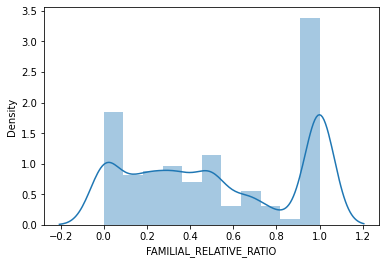

In [102]:
sns.distplot(network_diversity_tb_clean['FAMILIAL_RELATIVE_RATIO'])

In [103]:
# x = network_diversity_tb_clean[[
#     'RELTYPE_SIMPSON',
#     'RELTYPE_SHANNON'
# ]].copy()

# x = x.dropna()

# # Plot observed vs predicted cross valdated results
# a = x['RELTYPE_SIMPSON']
# b = x['RELTYPE_SHANNON']

# # get coeffs of linear fit
# slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)

# # use line_kws to set line label for legend
# plt.figure(figsize=(6,6))
# ax = sns.regplot(a, b, data=x, color='b', 
#  #line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}
#                 )

# # plot label and legends
# plt.xlabel('RELTYPE_SIMPSON', {'fontname':'Arial', 'size':'20'})
# plt.ylabel('RELTYPE_SHANNON', {'fontname':'Arial', 'size':'20'})
# #plt.xlim(10, 65)
# #plt.ylim(10, 65)


# #ax.legend(loc="best", title=r"$p = {}, r = {}$".format(p_value.round(3), r_value.round(3)), title_fontsize="x-large")
# #ax.legend(loc="best", title=r"$p = {}, r = {}$".format(p_value.round(3), r_value.round(3)), title_fontsize="xx-large")


# print("Model with best parameters")
# plt.show()

# print ("r:",r_value)
# print ("p:",p_value)
# print ("std_err:",std_err)
# print ("slope:",slope)

# Merge tables

In [104]:
fhs_network_features_clean

,idr,DENSITY,CONSTRAINT,EFFECTIVE_SIZE,DEGREE,DEGREE_CENTRALITY,EIGENVECTOR,KATZ,CLOSENESS_CENTRALITY,BETWEENNESS_CENTRALITY,CLUSTCOEF
0,2.450817e+09,0.00087,1.000000,1.000000,1,0.000128,1.858149e-10,0.000087,0.098151,0.000000,0.000000
1,2.450617e+09,0.00087,0.506173,2.333333,3,0.000383,5.258004e-09,0.000071,0.110117,0.000231,0.333333
2,2.450203e+09,0.00087,0.107119,5.666667,21,0.002680,4.653956e-03,0.001595,0.194065,0.000304,0.766667
3,2.450571e+09,0.00087,0.075507,15.965517,29,0.003701,5.537345e-03,-0.010123,0.195987,0.001904,0.465517
4,2.450942e+09,0.00087,0.049222,37.928571,56,0.007147,2.650506e-02,-0.006316,0.211850,0.009554,0.328571
...,...,...,...,...,...,...,...,...,...,...,...
7832,2.450822e+09,0.00087,0.663869,1.000000,2,0.000255,4.396701e-06,0.000272,0.146115,0.000000,1.000000
7833,2.450474e+09,0.00087,0.663869,1.000000,2,0.000255,4.396701e-06,0.000272,0.146115,0.000000,1.000000
7834,2.450555e+09,0.00087,1.000000,1.000000,1,0.000128,4.235583e-06,0.000241,0.146109,0.000000,0.000000
7835,2.450593e+09,0.00087,1.000000,1.000000,1,0.000128,1.121701e-06,-0.000482,0.141308,0.000000,0.000000


In [105]:
x = wkthru_data_select.merge(demsurv_data_clean, on='idr', how='outer')\
    .merge(fhs_network_features_clean, on='idr', how='outer')\
    .merge(apoe_data_clean, on='idr', how='outer')\
    .merge(diab_data_clean, on='idr', how='outer')\
    .merge(cvd_tb, on='idr', how='outer')\
    .merge(death_status, on='idr', how='outer')\
    .merge(educ_clean, on='idr', how='outer')\
    .merge(neuropsych_clean, on='idr', how='outer')\
    .merge(network_diversity_tb_clean, on='idr', how='outer')
combined = x.copy()

print(combined.shape)
combined.head()

(14122, 78)


,idr,SEX_x,AGE1_x,BMI1,CURRSMK1,SBP1,DBP1,CALC_LDL1,HDL1,TC1,TRIG1,DATE1,DEM_STATUS,DEM_SURVDATE,AD_STATUS,VAD_STATUS,DENSITY,CONSTRAINT,EFFECTIVE_SIZE,DEGREE,DEGREE_CENTRALITY,EIGENVECTOR,KATZ,CLOSENESS_CENTRALITY,BETWEENNESS_CENTRALITY,CLUSTCOEF,APOE_x,APOE_risk,CURR_DIAB1,CVD_EVENT_TYPE,CVD_EVENT_DATE,CVD_YES,Deceased_Date,Death_status_at_followup,HS_education,education_4level,CES-D_score,CSD-D_loneliness_item,AGE35,AGE65,AGE_Q,AGE_10,sharealterid,RELTYPE,FAMILIAL,ALTERTYPE,SEX_y,AGE1_y,idtype,alteridtype,SPELLBEGIN,SPELLEND,APOE_y,EDUCG,CESD_TOT,CESD_16,CESD_20,CESD_LONELINESS,LONELY_3,SNI_TOT,SNI_2,DIST1_5,DIST7_5,SEX_SHANNON,RELTYPE_SHANNON,ALTERTYPE_SHANNON,AGE35_SHANNON,AGE65_SHANNON,AGE_Q_SHANNON,AGE_10_SHANNON,SNI_TOT_SHANNON,SNI_2_SHANNON,EDU_COLLEGE_SHANNON,EDU_HS_SHANNON,FAMILIAL_RELATIVE_RATIO,APOE4_+_RATIO,DIST1_5_NEAR_RATIO,DIST7_5_NEAR_RATIO
0,2.450200e+09,1.0,30.0,30.854764,0.0,149.0,98.0,98.0,37.0,167.0,160.0,0.0,0.0,45.736986,0.0,0.0,0.00087,0.061332,31.320000,50.0,0.006381,1.979110e-01,0.007378,0.206993,5.862194e-03,0.381224,34.0,1.0,0.0,6.0,10650.0,1.0,NaN,NaN,1.0,b:HSdeg,16.0,0.0,0.0,0.0,"(21.25, 37.5]",<=30,2.450229e+09,NONRELATIVE,NONRELATIVE,COWORKERNR,1.0,30.0,1.0,1.0,40.0,191.0,34.0,NaN,16.0,>=16,<20,0.0,<3,29.0,>2,NEAR,NEAR,0.650818,0.348832,0.794939,0.601154,0.0,0.780264,1.213494,2.948553,0.0,0.684232,0.325083,0.111111,0.315789,0.933333,0.555556
1,2.450200e+09,2.0,16.0,29.071179,0.0,140.0,78.0,152.0,61.0,247.0,168.0,0.0,NaN,NaN,NaN,NaN,0.00087,0.925926,1.000000,3.0,0.000383,2.411523e-56,0.000114,0.000383,0.000000e+00,1.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,"(4.935, 21.25]",<=20,2.450320e+09,RELATIVE,RELATIVE,FATHER,2.0,16.0,1.0,0.0,1.0,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEAR,Far,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
2,2.450200e+09,1.0,26.0,29.770382,0.0,120.0,70.0,116.0,24.0,179.0,195.0,0.0,0.0,23.750685,0.0,0.0,0.00087,0.479777,1.500000,4.0,0.000510,1.782325e-05,0.001040,0.141813,3.177449e-07,0.833333,23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,"(21.25, 37.5]",<=30,2.450340e+09,NONRELATIVE,NONRELATIVE,SAMEADNREL,1.0,26.0,1.0,1.0,35.0,137.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEAR,Far,0.000000,0.693147,0.693147,0.000000,0.0,0.693147,0.693147,0.693147,0.0,0.000000,0.000000,0.500000,0.500000,1.000000,0.000000
3,2.450200e+09,2.0,26.0,20.829412,0.0,113.0,78.0,164.0,34.0,211.0,63.0,0.0,NaN,NaN,NaN,NaN,0.00087,0.361751,3.000000,7.0,0.000893,2.536099e-05,-0.000418,0.135938,2.317970e-04,0.666667,NaN,NaN,0.0,12.0,12828.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,"(21.25, 37.5]",<=30,2.450203e+09,RELATIVE,RELATIVE,BROTHER,2.0,26.0,1.0,1.0,1.0,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Far,Far,0.673012,0.000000,0.500402,0.000000,0.0,0.500402,1.054920,1.098612,0.0,0.000000,0.000000,1.000000,0.500000,0.200000,0.200000
4,2.450201e+09,1.0,27.0,24.366400,0.0,100.0,68.0,105.0,61.0,177.0,55.0,0.0,0.0,38.915068,0.0,0.0,0.00087,0.292950,4.714286,7.0,0.000893,1.514762e-05,-0.000376,0.156180,9.509214e-04,0.380952,34.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,d:collgrad,12.0,0.0,0.0,0.0,"(21.25, 37.5]",<=30,2.450370e+09,RELATIVE,RELATIVE,SISTER,1.0,27.0,1.0,1.0,1.0,457.0,34.0,3.0,12.0,<16,<20,0.0,<3,27.0,>2,Far,Far,0.500402,0.673012,1.054920,0.673012,0.0,0.500402,0.950271,1.332179,0.0,0.000000,0.000000,0.600000,0.250000,0.600000,0.200000


In [106]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14122 entries, 0 to 14121
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idr                       14122 non-null  float64
 1   SEX_x                     4987 non-null   float64
 2   AGE1_x                    4987 non-null   float64
 3   BMI1                      4983 non-null   float64
 4   CURRSMK1                  4971 non-null   float64
 5   SBP1                      4978 non-null   float64
 6   DBP1                      4978 non-null   float64
 7   CALC_LDL1                 4839 non-null   float64
 8   HDL1                      4885 non-null   float64
 9   TC1                       4902 non-null   float64
 10  TRIG1                     4900 non-null   float64
 11  DATE1                     4987 non-null   float64
 12  DEM_STATUS                11110 non-null  float64
 13  DEM_SURVDATE              11110 non-null  float64
 14  AD_STA

# define CVD at the time of exam 1

In [107]:
x = combined.copy()

# define CVD history variable:

# select participants who 
# 1) had a CVD at some point (CVD = 1)
# 2) such event occured before the CBC detection at exam 9
# We do not considered events that happened after exam 9 since (we are not supposed to know)

x.loc[(
    (x['CVD_YES'] == 1.0)
    & ((x['CVD_EVENT_DATE'] < x['DATE1'])
     ^(x['CVD_EVENT_DATE'] == x['DATE1']))
         ), 'CVD_HISTORY'] = 1.0

x['CVD_HISTORY'] = x['CVD_HISTORY'].fillna(0)

x = x.drop(columns=[
    'CVD_EVENT_TYPE',
    'CVD_EVENT_DATE',
    'CVD_YES'
])


# Define death status at follow up

In [108]:
# assign zero to death status for participants who did not die during follow up (for competing-risk models)
# if we have not observed it is because they did not die
x['Death_status_at_followup'] = x['Death_status_at_followup'].fillna(0)
x = x.drop(columns='Deceased_Date')

In [109]:
combined_dataset = x.copy()

In [110]:
ids = combined_dataset['idr'].unique()

In [111]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14122 entries, 0 to 14121
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idr                       14122 non-null  float64
 1   SEX_x                     4987 non-null   float64
 2   AGE1_x                    4987 non-null   float64
 3   BMI1                      4983 non-null   float64
 4   CURRSMK1                  4971 non-null   float64
 5   SBP1                      4978 non-null   float64
 6   DBP1                      4978 non-null   float64
 7   CALC_LDL1                 4839 non-null   float64
 8   HDL1                      4885 non-null   float64
 9   TC1                       4902 non-null   float64
 10  TRIG1                     4900 non-null   float64
 11  DATE1                     4987 non-null   float64
 12  DEM_STATUS                11110 non-null  float64
 13  DEM_SURVDATE              11110 non-null  float64
 14  AD_STA

# drop missing info

In [112]:
combined_drop = combined_dataset.dropna()
combined_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 4 to 4986
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idr                       2119 non-null   float64
 1   SEX_x                     2119 non-null   float64
 2   AGE1_x                    2119 non-null   float64
 3   BMI1                      2119 non-null   float64
 4   CURRSMK1                  2119 non-null   float64
 5   SBP1                      2119 non-null   float64
 6   DBP1                      2119 non-null   float64
 7   CALC_LDL1                 2119 non-null   float64
 8   HDL1                      2119 non-null   float64
 9   TC1                       2119 non-null   float64
 10  TRIG1                     2119 non-null   float64
 11  DATE1                     2119 non-null   float64
 12  DEM_STATUS                2119 non-null   float64
 13  DEM_SURVDATE              2119 non-null   float64
 14  AD_STATU

In [113]:
clean_tb = combined_drop.copy()
clean_tb.columns

Index(['idr', 'SEX_x', 'AGE1_x', 'BMI1', 'CURRSMK1', 'SBP1', 'DBP1',
       'CALC_LDL1', 'HDL1', 'TC1', 'TRIG1', 'DATE1', 'DEM_STATUS',
       'DEM_SURVDATE', 'AD_STATUS', 'VAD_STATUS', 'DENSITY', 'CONSTRAINT',
       'EFFECTIVE_SIZE', 'DEGREE', 'DEGREE_CENTRALITY', 'EIGENVECTOR', 'KATZ',
       'CLOSENESS_CENTRALITY', 'BETWEENNESS_CENTRALITY', 'CLUSTCOEF', 'APOE_x',
       'APOE_risk', 'CURR_DIAB1', 'Death_status_at_followup', 'HS_education',
       'education_4level', 'CES-D_score', 'CSD-D_loneliness_item', 'AGE35',
       'AGE65', 'AGE_Q', 'AGE_10', 'sharealterid', 'RELTYPE', 'FAMILIAL',
       'ALTERTYPE', 'SEX_y', 'AGE1_y', 'idtype', 'alteridtype', 'SPELLBEGIN',
       'SPELLEND', 'APOE_y', 'EDUCG', 'CESD_TOT', 'CESD_16', 'CESD_20',
       'CESD_LONELINESS', 'LONELY_3', 'SNI_TOT', 'SNI_2', 'DIST1_5', 'DIST7_5',
       'SEX_SHANNON', 'RELTYPE_SHANNON', 'ALTERTYPE_SHANNON', 'AGE35_SHANNON',
       'AGE65_SHANNON', 'AGE_Q_SHANNON', 'AGE_10_SHANNON', 'SNI_TOT_SHANNON',
       'SNI_2_S

In [116]:
clean_tb['APOE4']

KeyError: 'APOE4'

# Descriptive table

In [46]:
x = clean_tb.copy()

from tableone import TableOne

columns = [

'AGE1', 
'SEX',
'education_4level',
'HS_education',
'BMI1', 
'CURRSMK1', 
'SBP1', 
'DBP1', 
'CURR_DIAB1',
# 'CALC_LDL1',
# 'HDL1', 
# 'TC1', 
# 'TRIG1',
'APOE',
'APOE_risk',
'CVD_HISTORY',
#'DATE1', 
'DEM_STATUS', 
'DEM_SURVDATE',
'AD_STATUS', 
'VAD_STATUS', 
'Death_status_at_followup',
# 'DENSITY', 
# 'CONSTRAINT', 
# 'EFFECTIVE_SIZE',
# 'DEGREE', 
# 'DEGREE_CENTRALITY', 
# 'EIGENVECTOR', 'KATZ',
# 'CLOSENESS_CENTRALITY', 
# 'BETWEENNESS_CENTRALITY', 
# 'CLUSTCOEF',
#'Diversity',
'CES-D_score', 
'CSD-D_loneliness_item',
# 'SEX_SHANNON', 
# 'SEX_SIMPSON',
# 'RELTYPE_SHANNON', 
# 'RELTYPE_SIMPSON', 
# 'ALTERTYPE_SHANNON',
# 'ALTERTYPE_SIMPSON'
]

#Specify columns with categorical variables to stratify them in the table
categorical = [
    
#'AGE1', 
'SEX', 
'HS_education',
'education_4level',
#'BMI1', 
'CURRSMK1',
'CURR_DIAB1',
#'SBP1', 
#'DBP1', 
#'CALC_LDL1',
#'HDL1', 
#'TC1', 
#'TRIG1', 
#'DATE1', 
'CVD_HISTORY',
'DEM_STATUS', 
#'DEM_SURVDATE',
'AD_STATUS', 
'VAD_STATUS',
'Death_status_at_followup',
#'DENSITY', 
#'CONSTRAINT', 
#'EFFECTIVE_SIZE',
#'DEGREE', 
#'DEGREE_CENTRALITY', 
#'EIGENVECTOR', 'KATZ',
#'CLOSENESS_CENTRALITY', 
#'BETWEENNESS_CENTRALITY', 
#'CLUSTCOEF' 
'APOE_risk',
'APOE',
#'CES-D_score', 
'CSD-D_loneliness_item'
    
           ]

nonnormal = [
    'AGE1', 
    'BMI1', 
    'SBP1', 
    'DBP1', 
#     'CALC_LDL1', 
#     'HDL1', 
#     'TC1', 
#     'TRIG1', 
    'DEM_SURVDATE',
    'CES-D_score',
#     'DENSITY', 
#     'CONSTRAINT', 
#     'EFFECTIVE_SIZE', 
#     'DEGREE', 
#     'DEGREE_CENTRALITY', 
#     'EIGENVECTOR', 
#     'KATZ', 
#     'CLOSENESS_CENTRALITY', 
#     'BETWEENNESS_CENTRALITY', 
#     'CLUSTCOEF',
#     'Diversity'
            ]

#Categorical variable for stratification: 
#groupby = ['Event']

#alternative labels
#labels = {'Event': 'Dementia at follow up [0=No, 1=Yes]'}

mytable = TableOne(
    x, 
    columns=columns, 
    categorical=categorical, 
    #groupby=groupby, 
    nonnormal=nonnormal, 
    #labels=labels,
    #pval=True
    )
#mytable



#################  EXPORT TO CSV


# output_results = '/Users/ramosj18/Library/Mobile Documents/com~apple~CloudDocs/NYU/Jaime_NYU/Alzheimer/Joel Salinas/results/tables/'

mytable.to_csv('Baseline_characteristics_of_cohort_wave1.csv')

mytable

/usr/local/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


Missing              Overall
n                                                                  2964
AGE1, median [Q1,Q3]                             0     34.0 [28.0,42.0]
SEX, n (%)                      1.0              0          1378 (46.5)
                                2.0                         1586 (53.5)
education_4level, n (%)         a:noHSdeg        0            133 (4.5)
                                b:HSdeg                      900 (30.4)
                                c:somecoll                   882 (29.8)
                                d:collgrad                  1049 (35.4)
HS_education, n (%)             0.0              0            133 (4.5)
                                1.0                         2831 (95.5)
BMI1, median [Q1,Q3]                             0     24.3 [21.9,27.2]
CURRSMK1, n (%)                 0.0              0          1778 (60.0)
                                1.0                         1186 (40.0)
SBP1, median [Q1,Q3]                             0  119.0 [110.0,129.0]
DBP1, median [Q1,Q3]                             0     78.0 [70.0,84.0]
CURR_DIAB1, n (%)               0.0              0          2939 (99.2)
                                1.0                            25 (0.8)
APOE, n (%)                     22.0             0             12 (0.4)
                                23.0                         387 (13.1)
                                24.0                           58 (2.0)
                                33.0                        1892 (63.8)
                                34.0                         569 (19.2)
                                44.0                           46 (1.6)
APOE_risk, n (%)                0.0              0          2291 (77.3)
                                1.0                          673 (22.7)
CVD_HISTORY, n (%)              0.0              0          2951 (99.6)
                                1.0                            13 (0.4)
DEM_STATUS, n (%)               0.0              0          2710 (91.4)
                                1.0                           254 (8.6)
DEM_SURVDATE, median [Q1,Q3]                     0     40.1 [35.0,44.1]
AD_STATUS, n (%)                0.0              0          2776 (93.7)
                                1.0                           188 (6.3)
VAD_STATUS, n (%)               0.0              0          2915 (98.3)
                                1.0                            49 (1.7)
Death_status_at_followup, n (%) 0.0              0          2496 (84.2)
                                1.0                          468 (15.8)
CES-D_score, median [Q1,Q3]                      0     14.0 [12.0,17.0]
CSD-D_loneliness_item, n (%)    0.0              0          2447 (82.6)
                                1.0                          377 (12.7)
                                2.0                            95 (3.2)
                                3.0                            45 (1.5)

# Survival analysis in R (save data as CSV)

In [80]:
# output_data = '/Users/ramosj18/Library/Mobile Documents/com~apple~CloudDocs/NYU/Jaime_NYU/Alzheimer/Joel Salinas/output_data/'

clean_tb.to_csv('FHS_Network_features_dementia_survival-data_v2.csv')



In [49]:
# OLD CODE

# Survival analysis in lifelines [OPTIONAL]

In [37]:
clean_tb['DEM_STATUS'].value_counts()

0.0    2764
1.0     260
Name: DEM_STATUS, dtype: int64

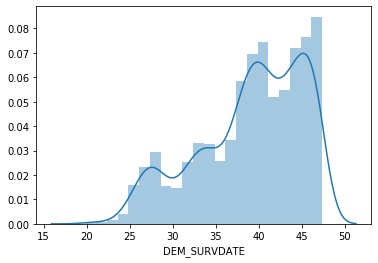

In [38]:
sns.distplot(clean_tb['DEM_SURVDATE'])

In [155]:
import lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.utils.sklearn_adapter import sklearn_adapter

In [156]:
clean_tb.columns

Index(['idr', 'SEX', 'AGE1', 'BMI1', 'CURRSMK1', 'SBP1', 'DBP1', 'CALC_LDL1',
       'HDL1', 'TC1', 'TRIG1', 'DATE1', 'DEM_STATUS', 'DEM_SURVDATE',
       'AD_STATUS', 'VAD_STATUS', 'DENSITY', 'CONSTRAINT', 'EFFECTIVE_SIZE',
       'DEGREE', 'DEGREE_CENTRALITY', 'EIGENVECTOR', 'KATZ',
       'CLOSENESS_CENTRALITY', 'BETWEENNESS_CENTRALITY', 'CLUSTCOEF', 'APOE',
       'APOE_risk', 'CURR_DIAB1', 'Death_status_at_followup', 'CVD_HISTORY'],
      dtype='object')

In [37]:
a = clean_tb[[
    #'AGE1', 'SEX', 
    #'BMI1', 
    #'CURRSMK1', 'SBP1', 'DBP1', 'CALC_LDL1',
    #'HDL1', 'TC1', 'TRIG1', 
    #'DATE1', 
    #'APOE_risk',
    
    'DEM_STATUS', 'DEM_SURVDATE',
    #'AD_STATUS', 'VAD_STATUS', 
    
    #'DENSITY', ### feature is network global, not node specific
    
    'DEGREE', 
    #'DEGREE_CENTRALITY',
    
    #'CONSTRAINT', 
    #'EFFECTIVE_SIZE',
 
    #'EIGENVECTOR', 
    #'KATZ',
    #'CLOSENESS_CENTRALITY', 
    #'BETWEENNESS_CENTRALITY', 
    #'CLUSTCOEF'
    
]].copy()

In [38]:
#sns.distplot(a['CONSTRAINT'])

In [39]:
# if convergence problems occur, try including a penalizer
# e.g. cph = CoxPHFitter(penalizer=7).fit(a, 'time-to-event', 'Event')  # the lower the penalizer the better

from lifelines.utils import concordance_index
cph = CoxPHFitter().fit(a, 'DEM_SURVDATE', 'DEM_STATUS')  
print("Concordance index of Cox PH model is:", concordance_index(a['DEM_SURVDATE'], -cph.predict_partial_hazard(a), a['DEM_STATUS']))

Concordance index of Cox PH model is: 0.4974363802268152


In [40]:
cph.check_assumptions(a, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


In [41]:
T = a['DEM_SURVDATE'] #T: Time
E = a["DEM_STATUS"] #E: Events

from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(a, duration_col='DEM_SURVDATE', event_col='DEM_STATUS') #, strata=['Education>HS'])

cph.print_summary()  # access the results using cph.summary

<lifelines.CoxPHFitter: fitted with 3604 total observations, 3286 right-censored observations>
             duration col = 'DEM_SURVDATE'
                event col = 'DEM_STATUS'
      baseline estimation = breslow
   number of observations = 3604
number of events observed = 318
   partial log-likelihood = -2452.72
         time fit was run = 2021-07-20 18:42:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
DEGREE      0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
             z    p   -log2(p)
covariate                     
DEGREE    0.83 0.41       1.30
---
Concordance = 0.50
Partial AIC = 4907.45
log-likelihood ratio test = 0.67 on 1 df
-log2(p) of ll-ratio test = 1.28